## Customer Retention Analysis (Churn analysis) using python.
### The PwC Switzerland Churn Dataset

#### *Explanatory Data analysis to understand the reasons for churning among members and the kinds of customers we should examine as "soon to churn". Using the Churn dataset provided in the Pwc Virtual Internship program on Forage.*

Lets take a peak look at the dataset we would be using, we load the important libraries and bring our data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline


In [2]:
Churn = pd.read_excel(r"C:\Users\user\Downloads\ChurnDataset.xlsx")

In [3]:
Churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


Lets look at the column names

In [4]:
Churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

The Type of data each columns contains.

In [5]:
Churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
numAdminTickets       int64
numTechTickets        int64
Churn                object
dtype: object

Lets look at the Data Shape.

In [6]:
Churn.shape

(7043, 23)

Checking the Descriptive Statistics of the Numeric Variables in the Dataset

In [7]:
Churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.515689,0.419566
std,0.368612,24.559481,30.090047,1.275299,1.250117
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,0.000000,0.000000
max,1.000000,72.000000,118.750000,5.000000,9.000000


we can see from the dataset that 25% of the Monthly charges were higher than the mean. And 75% of the dataset were not Senior Citizens, although its just in 0's and 1's.

Also 50% of the customers have spent less than 29 Months Since using Our services.

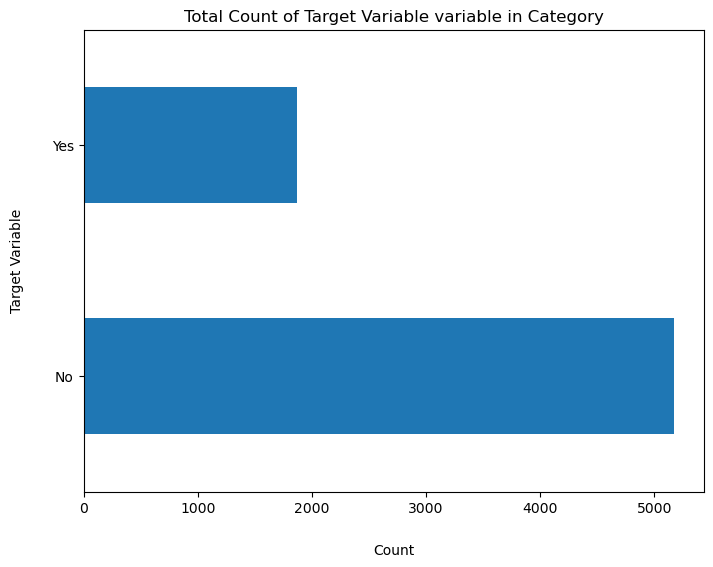

In [8]:
Churn['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel('Count', labelpad = 20)
plt.ylabel('Target Variable', labelpad = 20)
plt.title('Total Count of Target Variable variable in Category')
plt.show()

Lets find out How they Differ in percentage

In [9]:
100*Churn['Churn'].value_counts()/len(Churn['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

There are more customers in the Services that havent churned yet

In [10]:
Churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

So we look to take them out of the equation and focus on the 1869 of them that churned and the reason for that


##### The Heatmap of the Data

<Axes: >

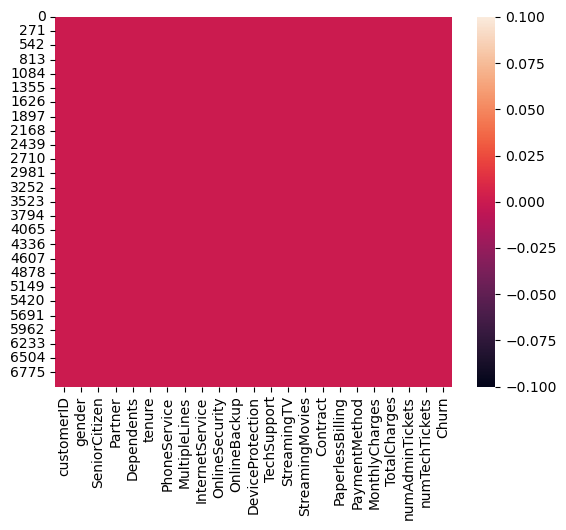

In [11]:
sns.heatmap(Churn.isnull())

The data is clear and clean, every column is being accounted for and we can do

#### Missing Data - Initial Intuition

* Here, we don't have any missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

##### We Create a new Dataframe for Manipulation

In [12]:
CRA = Churn

In [13]:
CRA

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,0,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,5,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,0,0,Yes


In [14]:
CRA.TotalCharges = pd.to_numeric(CRA.TotalCharges, errors = 'coerce')

Lets look at our data types again

In [15]:
CRA.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
numAdminTickets       int64
numTechTickets        int64
Churn                object
dtype: object

In [16]:
# for the Null Values
CRA.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
dtype: int64

**Missing Value Treatement**

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [17]:
CRA.dropna(inplace = True)

In [18]:
CRA.shape

(7032, 23)

In [19]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

CRA['tenure_group'] = pd.cut(CRA.tenure, range(1, 80, 12), right=False, labels=labels)

In [20]:
CRA

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,0,0,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.50,0,0,No,13 - 24
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,5,No,61 - 72
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0,No,1 - 12
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.60,0,0,Yes,1 - 12


In [21]:
CRA.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
numAdminTickets        int64
numTechTickets         int64
Churn                 object
tenure_group        category
dtype: object

In [22]:
CRA.tenure_group.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [23]:
CRA.groupby(CRA.Churn).tenure_group.value_counts()

Churn  tenure_group
No     61 - 72         1314
       1 - 12          1138
       13 - 24          730
       49 - 60          712
       25 - 36          652
       37 - 48          617
Yes    1 - 12          1037
       13 - 24          294
       25 - 36          180
       37 - 48          145
       49 - 60          120
       61 - 72           93
Name: tenure_group, dtype: int64

In [24]:
# Lets drop the data columns that we are not using for analysis
CRA.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [25]:
CRA.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'numAdminTickets', 'numTechTickets', 'Churn',
       'tenure_group'],
      dtype='object')

### Data Exploration
**1.  Plot distibution of individual predictors by churn**

Here we want to look at the Variables in the dataset counts and totals based on the Targeted Variable and have a clear information. it is known as **UNIVARIATE ANALYSIS**

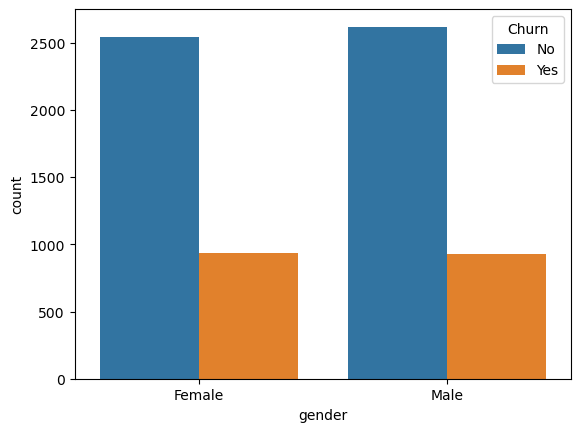

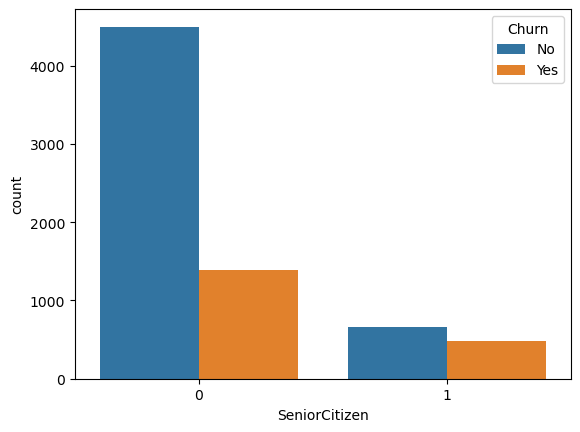

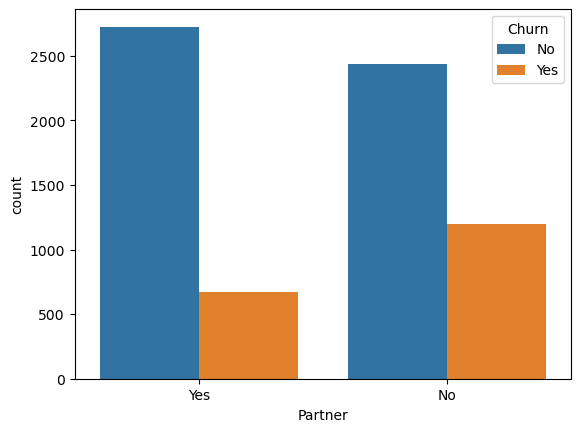

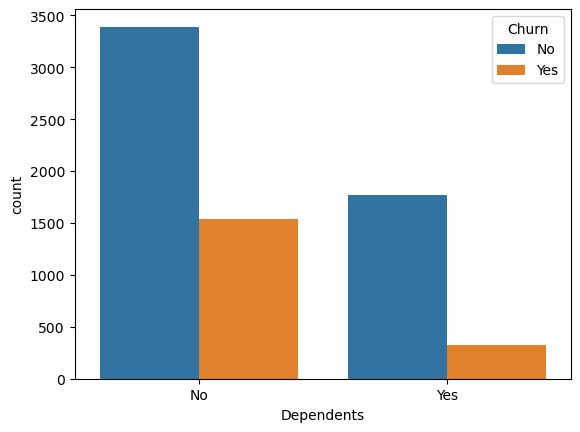

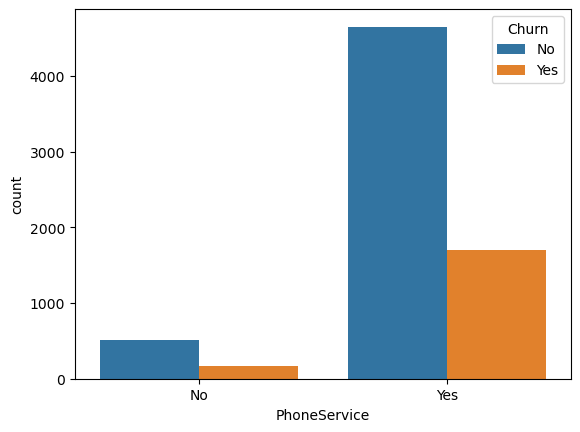

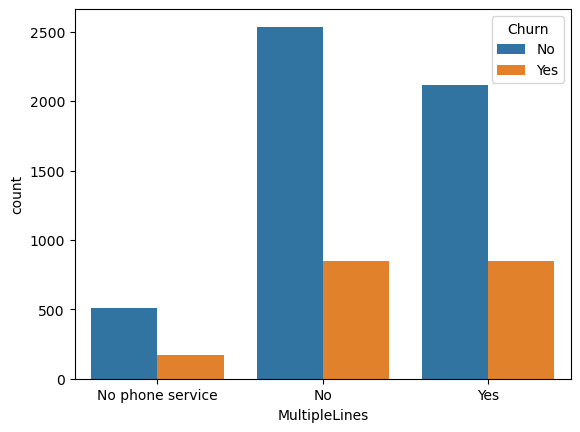

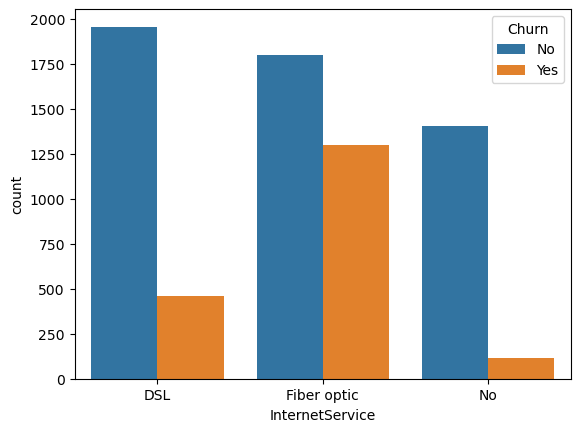

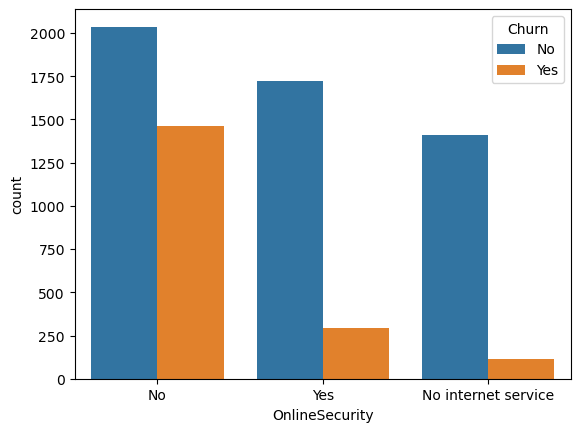

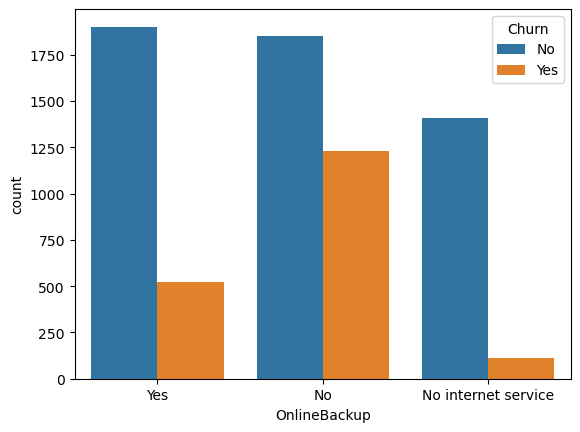

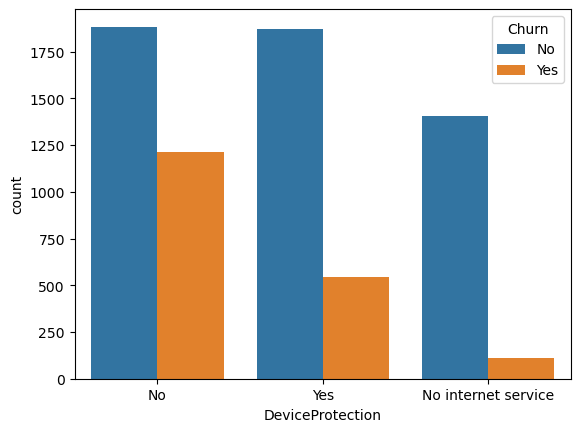

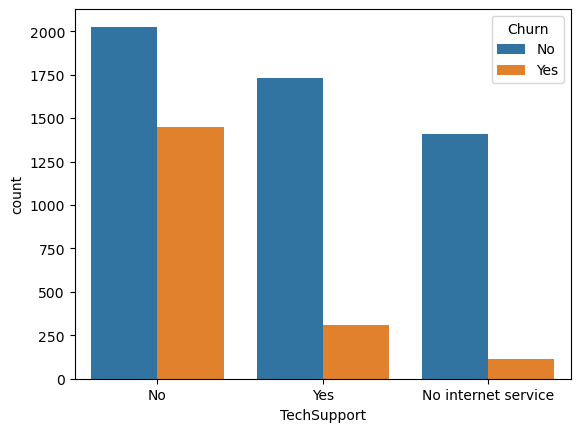

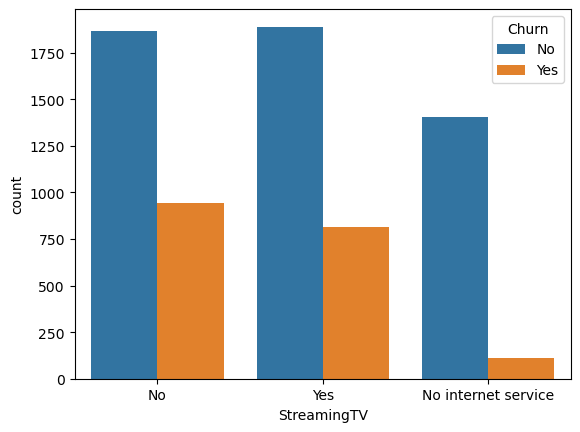

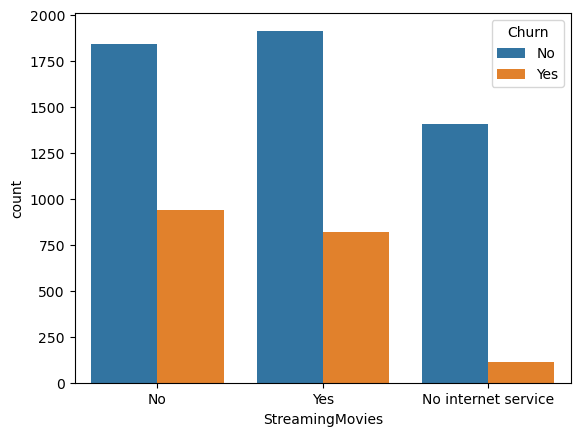

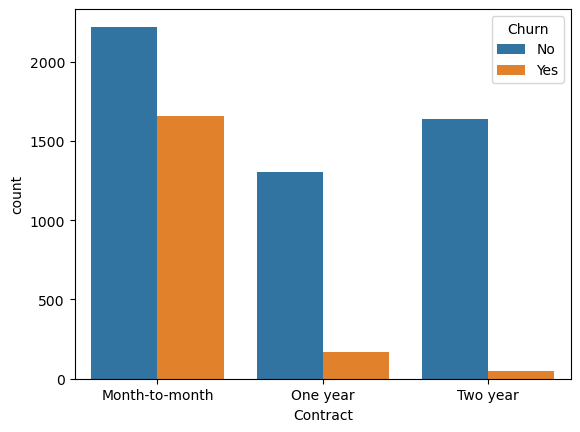

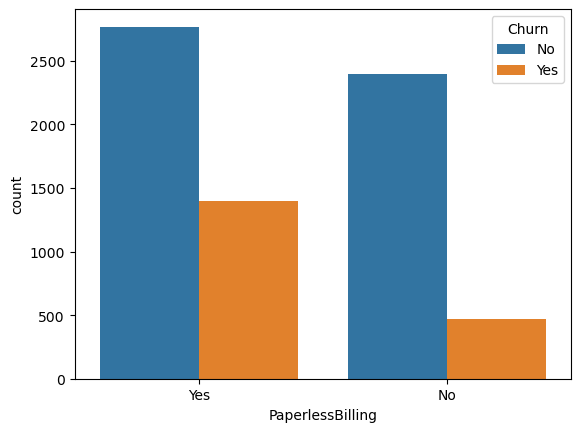

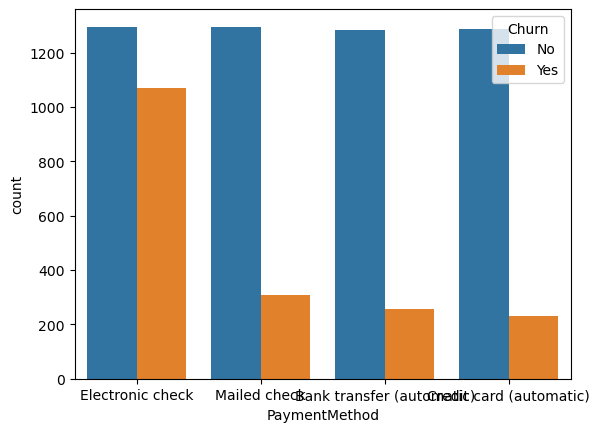

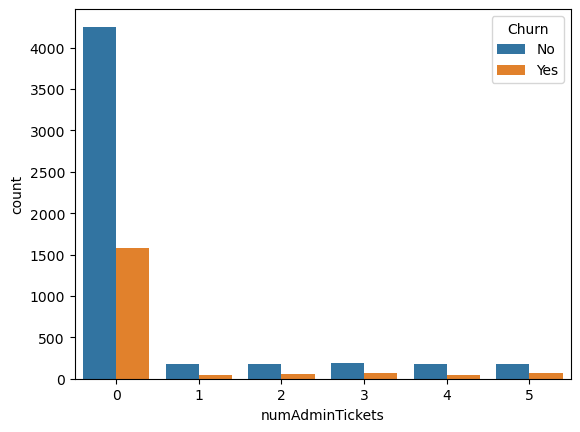

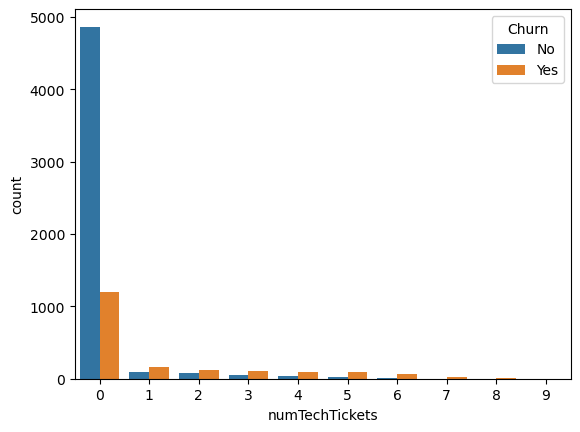

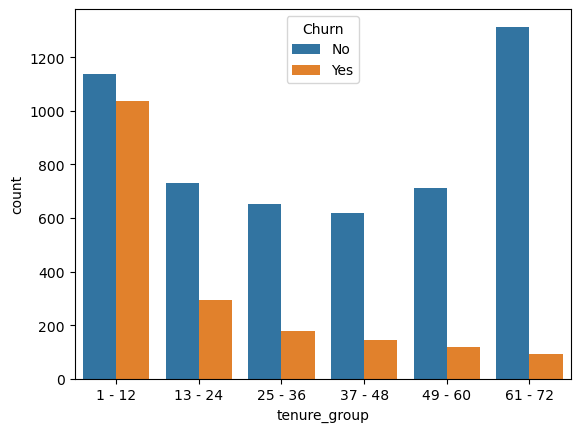

In [26]:
for i, predictor in enumerate(CRA.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=CRA, x=predictor, hue='Churn')

<Axes: xlabel='PhoneService', ylabel='count'>

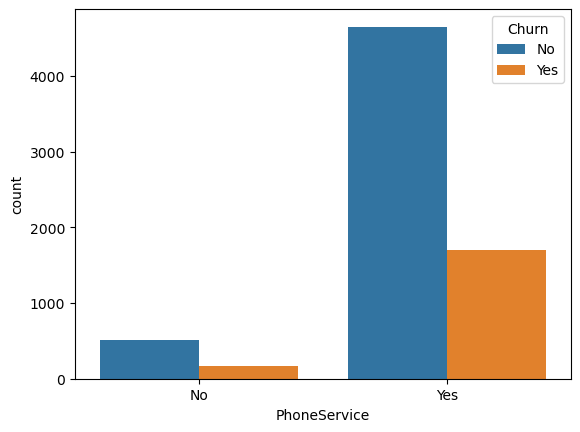

In [33]:
sns.countplot(data = CRA, x = CRA.PhoneService, hue = 'Churn')

#### 2. Lets convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [34]:
CRA['Churn'] = np.where(CRA.Churn == 'Yes',1,0)

In [36]:
CRA.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,One year,No,Mailed check,56.95,1889.50,0,0,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,1,1 - 12


**3. Convert all the categorical variables into dummy variables**

In [38]:
CRA_Dummies = pd.get_dummies(CRA)
CRA_Dummies

,SeniorCitizen,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,3,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,5,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,0,0,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0


**4.  Relationship between Monthly Charges and Total Charges, looking at the Dummy Variable Table.**

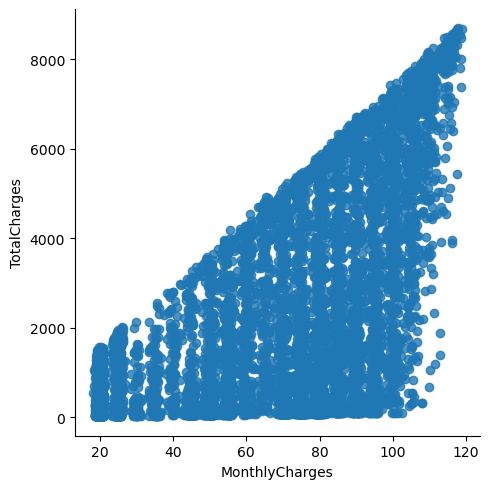

In [39]:
sns.lmplot(data=CRA_Dmmummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

As expedcted, Total Charges Increases As Monthly Charges Increases.

**5. Churn by Monthly Charges and Total Charges**

Text(0.5, 1.0, 'Monthly charges by churn')

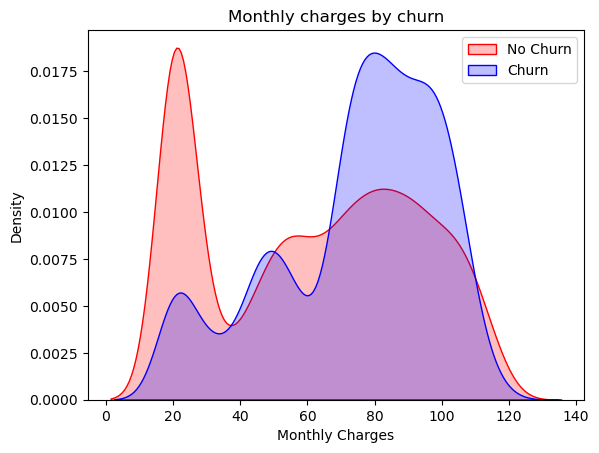

In [42]:
Mth = sns.kdeplot(CRA_Dummies.MonthlyCharges[(CRA_Dummies["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(CRA_Dummies.MonthlyCharges[(CRA_Dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Text(0.5, 1.0, 'Total charges by churn')

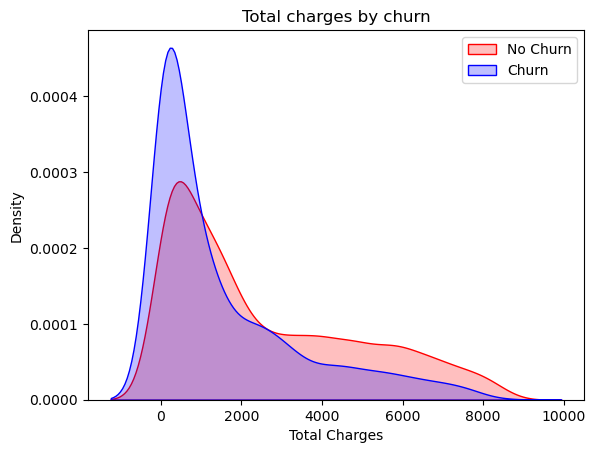

In [43]:
Mth = sns.kdeplot(CRA_Dummies.TotalCharges[(CRA_Dummies["Churn"] == 0) ],
                color="Red", fill = True)
Mth = sns.kdeplot(CRA_Dummies.TotalCharges[(CRA_Dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", fill= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Total Charges')
Mth.set_title('Total charges by churn')

**Surprising insight as higher Churn at lower Total Charges**

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linked to **High Churn**.

**6. Build a corelation of all predictors with 'Churn'**

<Axes: >

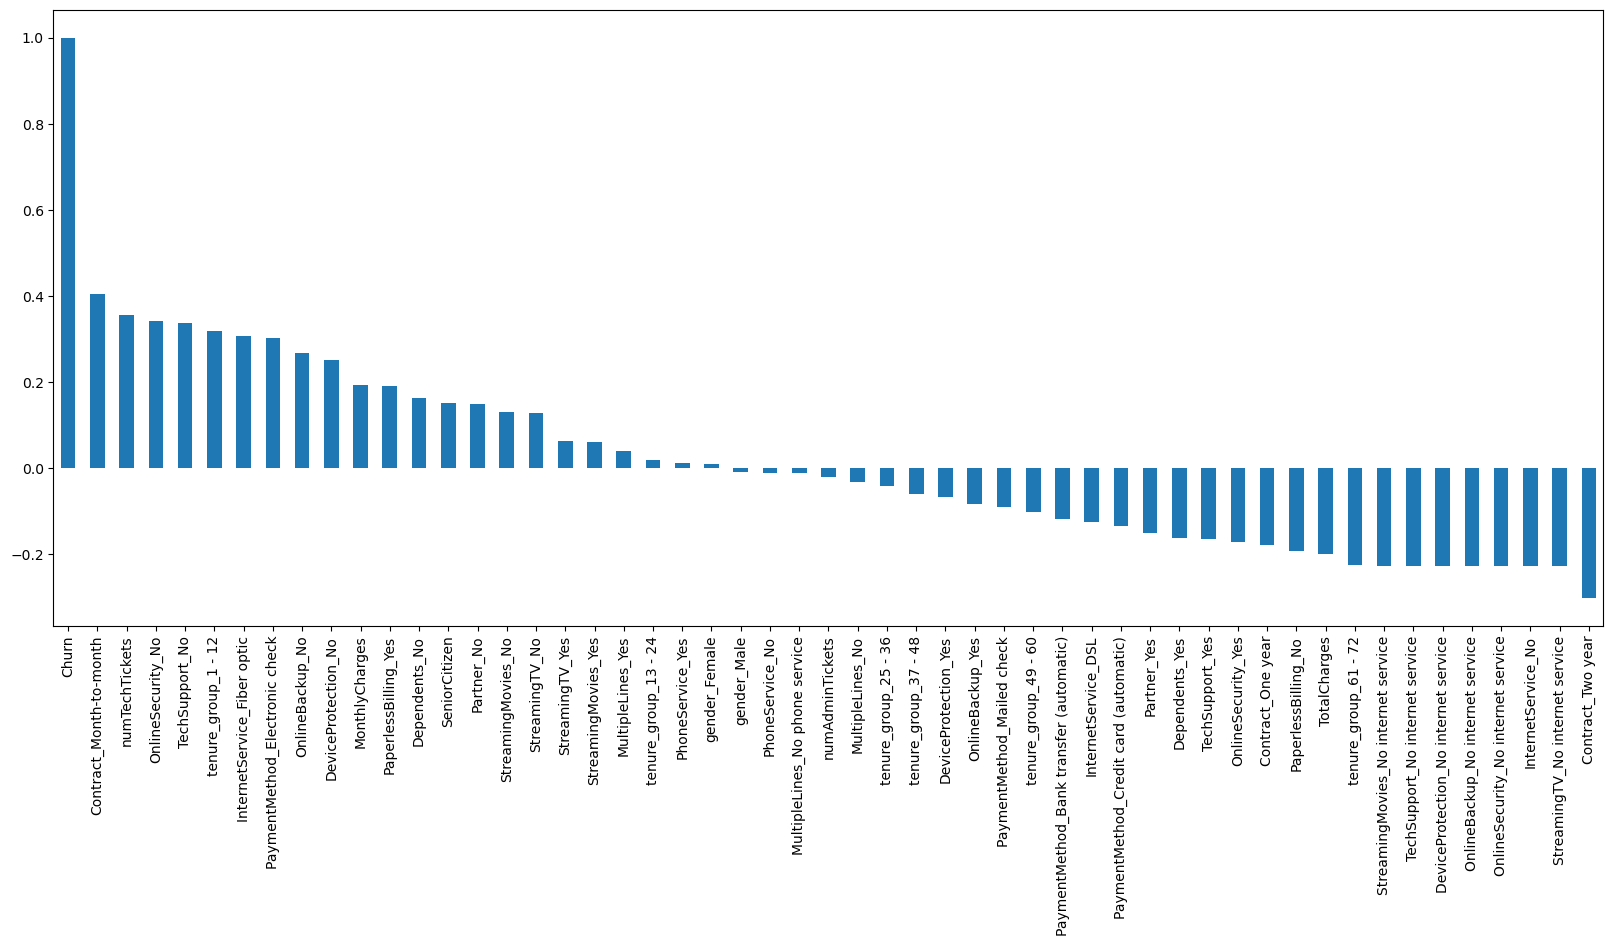

In [45]:
plt.figure(figsize=(20,8))
CRA_Dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

#### Bivariate Analysis
We are going to seperate the target variable into different dataframes to get the analysis of Churned customers and thse who didnt Churn.

In [48]:
CRA_0=CRA.loc[CRA.Churn == 0]
CRA_1=CRA[CRA.Churn == 1]

Text(0.5, 1.0, 'Distribution of Partner by Gender')

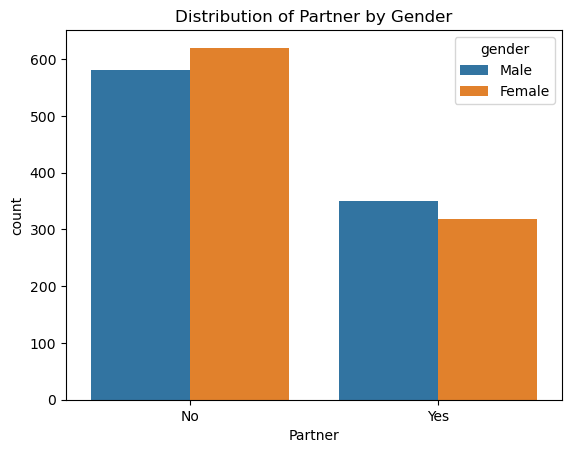

In [53]:
sns.countplot(CRA_1, x = 'Partner', hue = 'gender')
plt.title('Distribution of Partner by Gender in Churned Customers')

Text(0.5, 1.0, 'Distribution of Partner by Gender in Unchurned Customers')

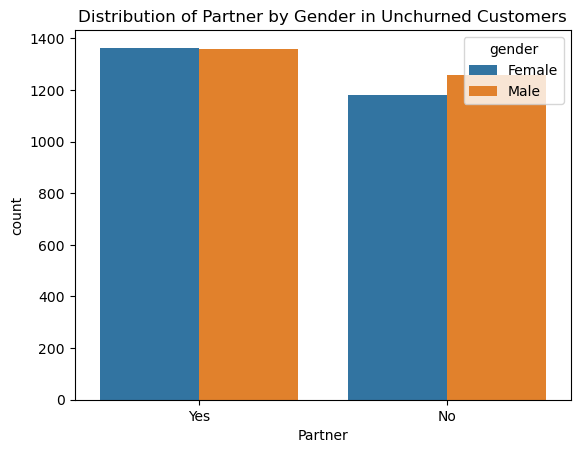

In [54]:
sns.countplot(CRA_0, x = 'Partner', hue = 'gender')
plt.title('Distribution of Partner by Gender in Unchurned Customers')

**From the above analysis we can see that more people tends to quit services when theyre not a partner compare to when they are, and more likely those without Partnership in the Unchurned group of Customers will more likely quit faster in the future.**

#### Lets take other variables into case study in the Churned Customers Dataset

In [57]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

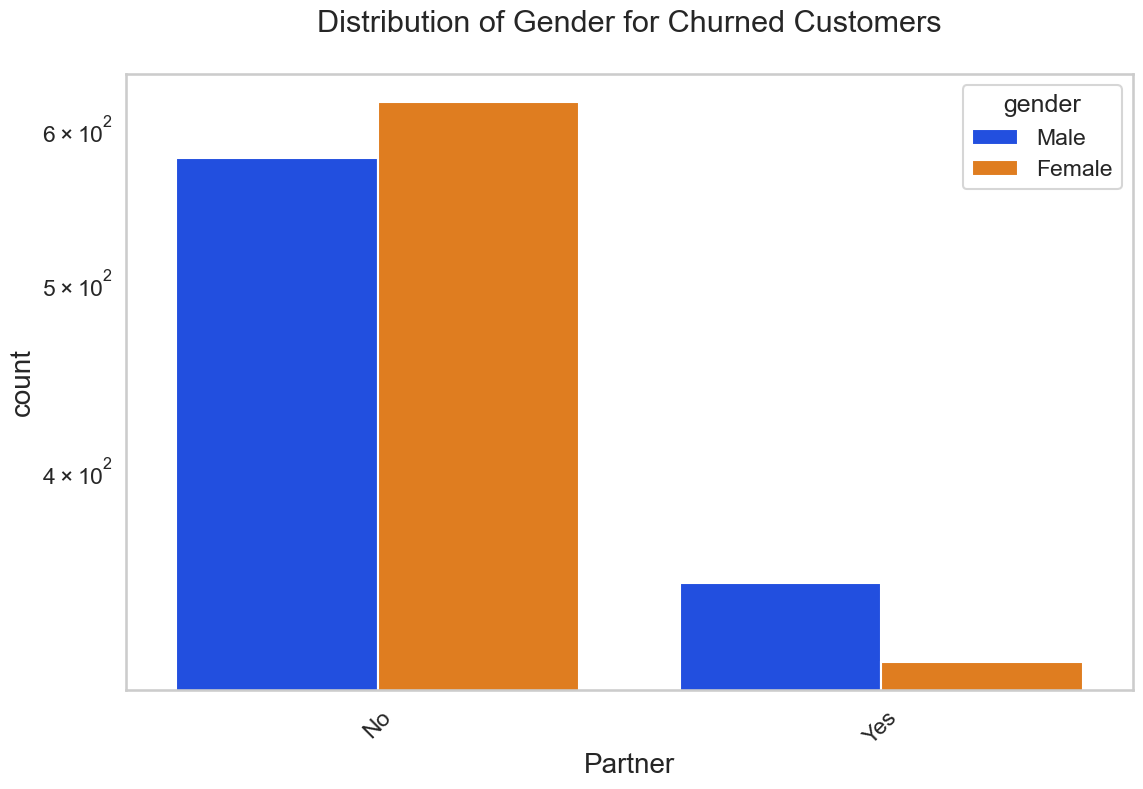

In [58]:
uniplot(CRA_1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

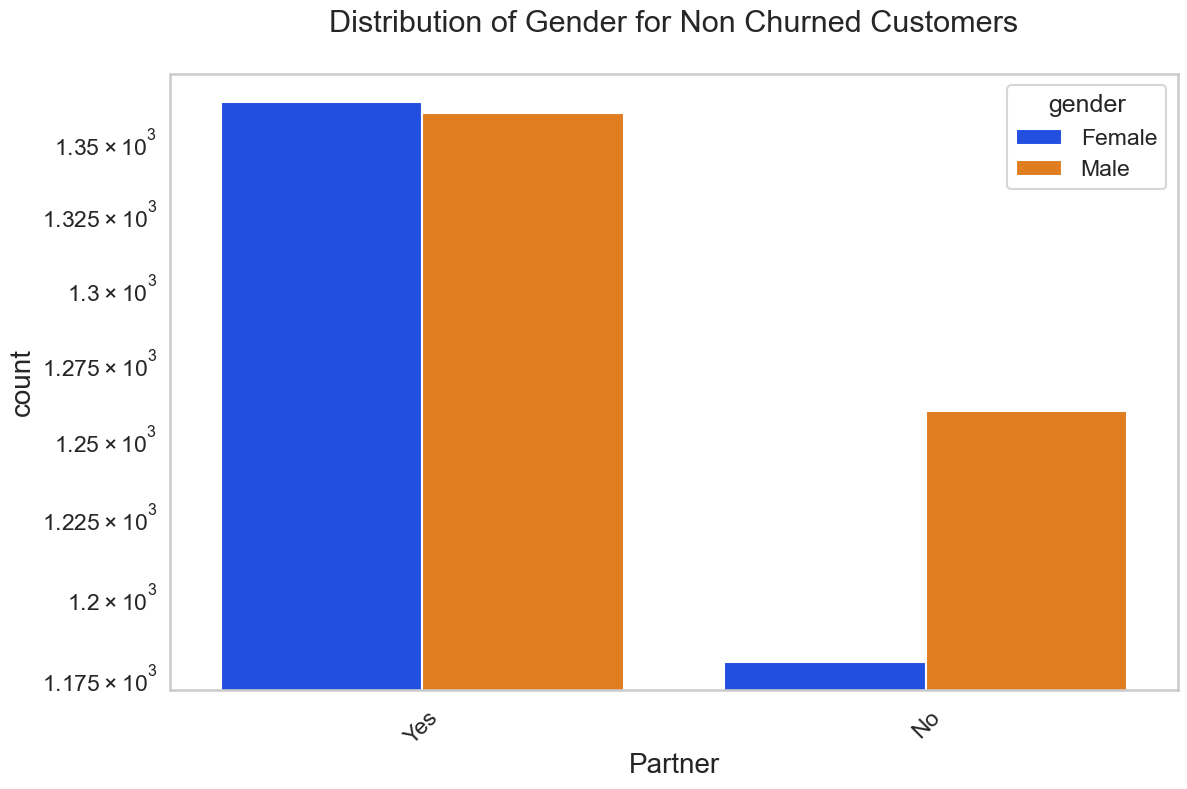

In [59]:
uniplot(CRA_0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

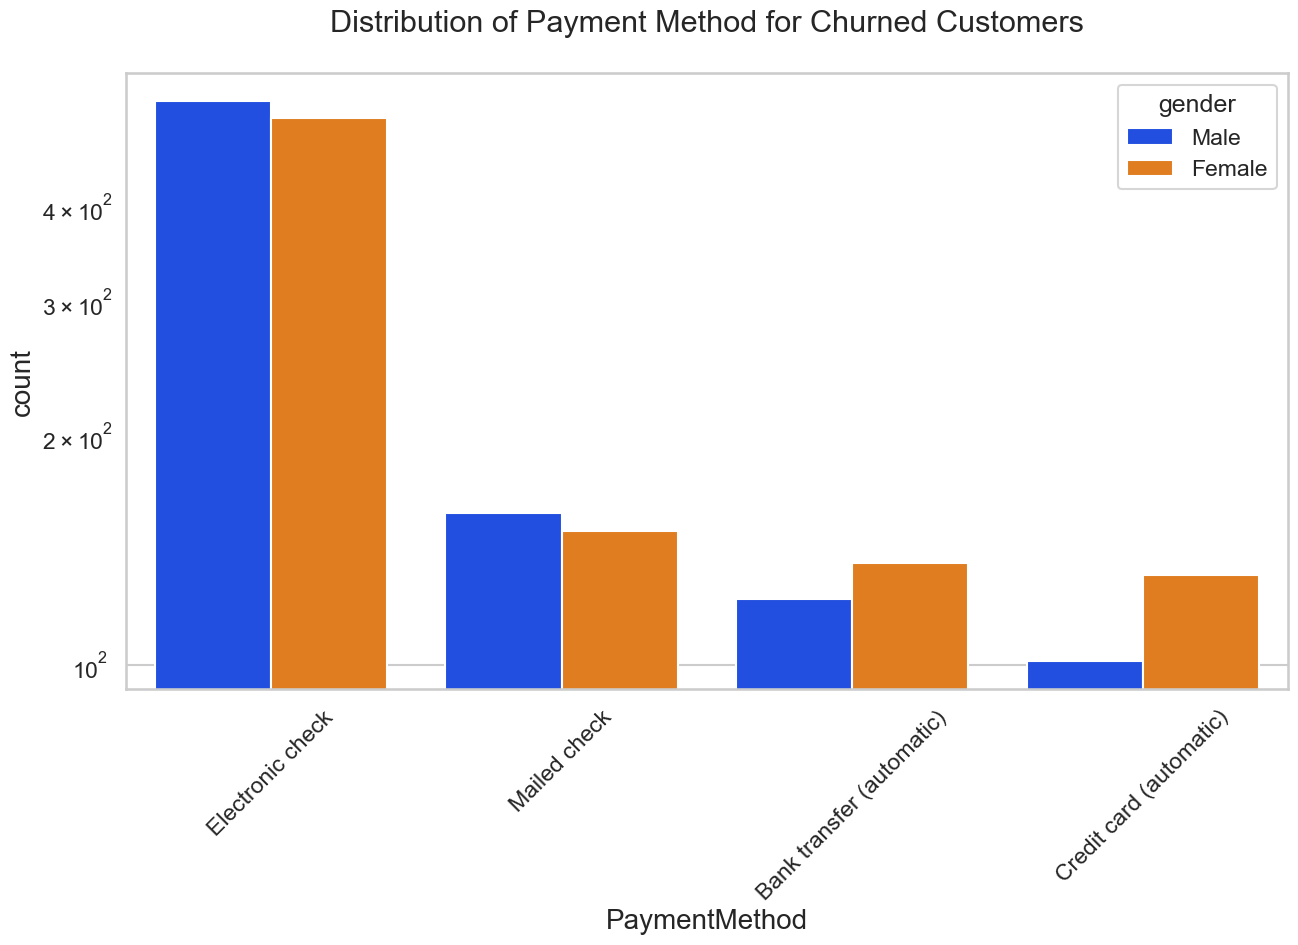

In [61]:
uniplot(CRA_1,col='PaymentMethod',title='Distribution of Payment Method for Churned Customers',hue='gender')

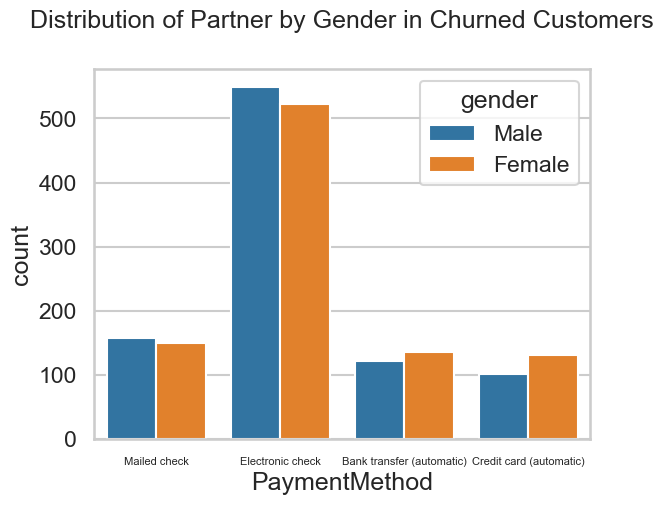

In [81]:
sns.countplot(CRA_1, x = 'PaymentMethod', hue = 'gender')
plt.title('Distribution of Partner by Gender in Churned Customers')
plt.xticks(size = 8)
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

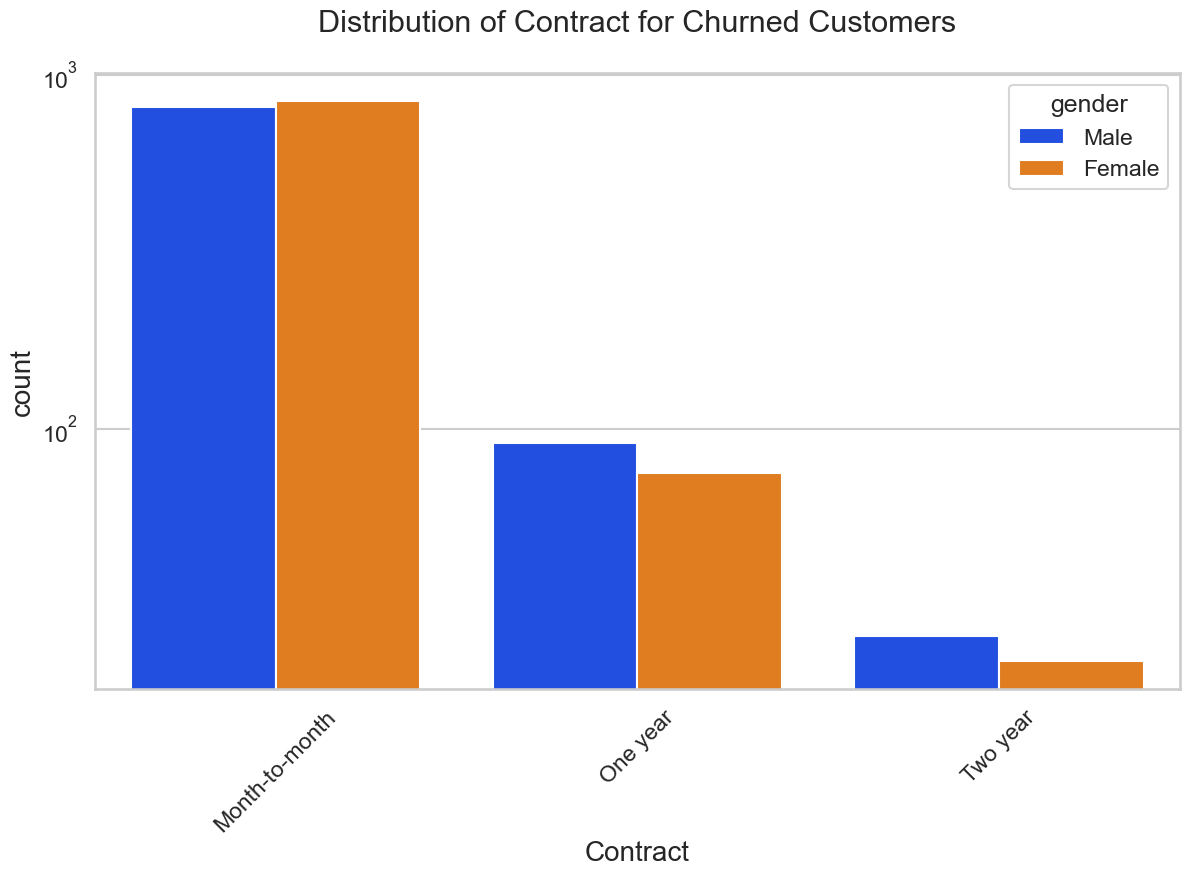

In [82]:
uniplot(CRA_1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

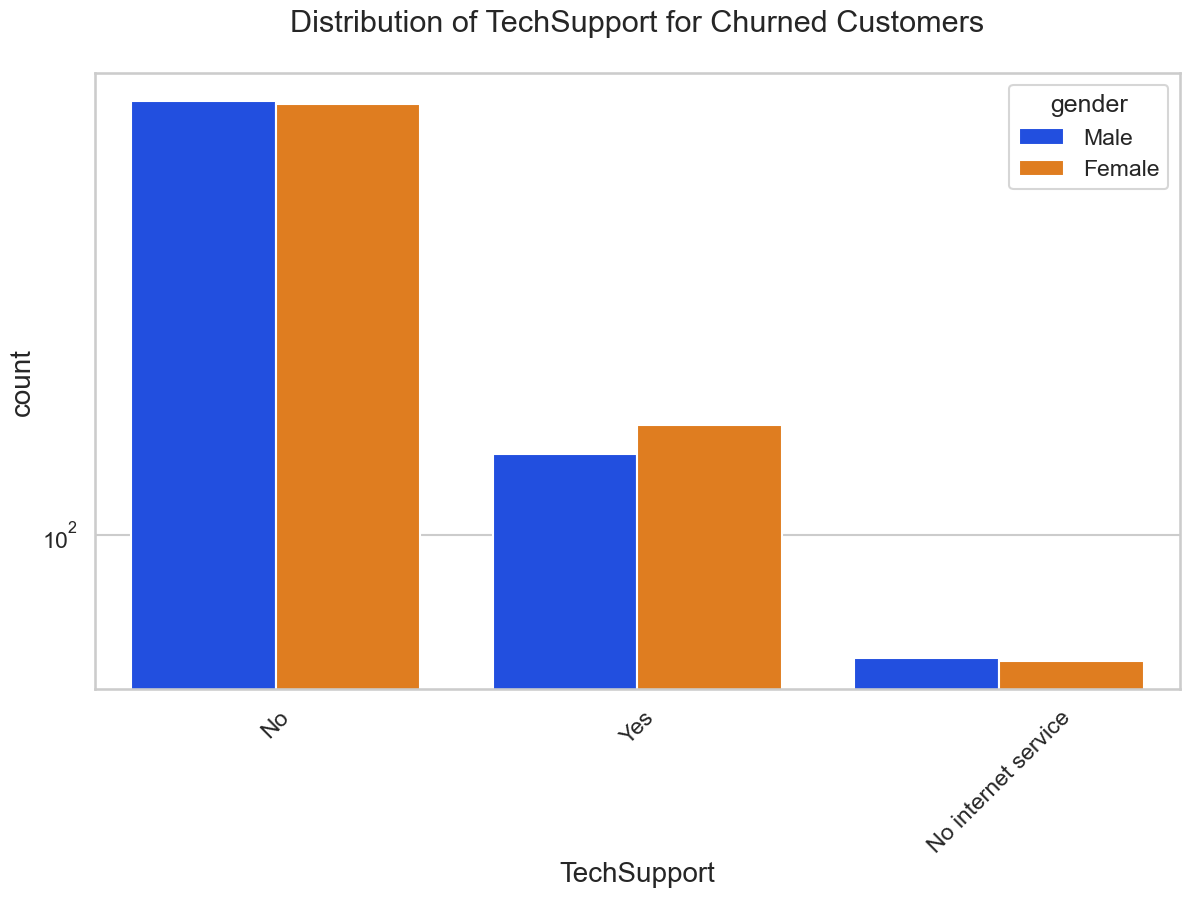

In [83]:
uniplot(CRA_1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

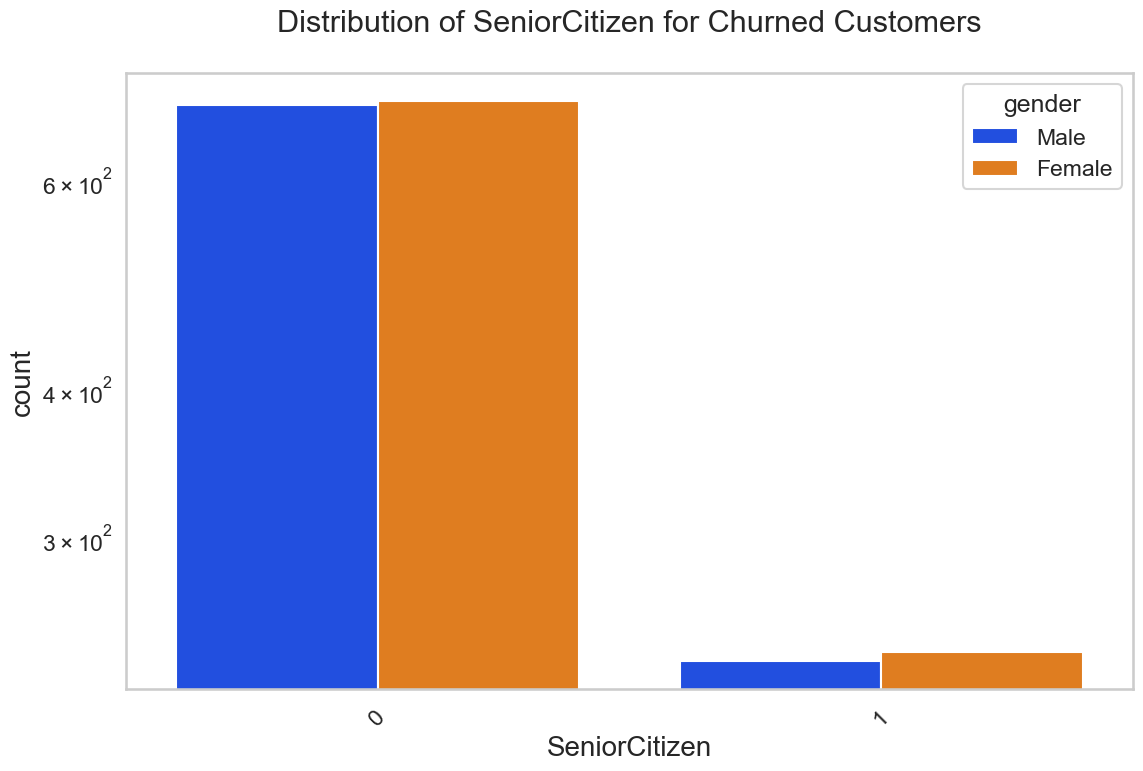

In [84]:
uniplot(CRA_1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# CONCLUSION

These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

Note: There could be many more such insights, so take this as an assignment and try to get more insights :)

In [85]:
CRA_Dummies.to_csv('ChurnDummy.csv')